In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./datasets/loan_data/train.csv')
dfcpy = pd.read_csv('./datasets/loan_data/train.csv')

In [2]:
# EXLORATORY DATA ANALYSIS
df.shape

(614, 13)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

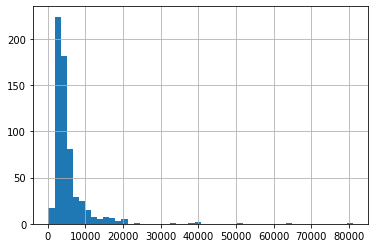

In [7]:
# Distribution Analysis
df['ApplicantIncome'].hist(bins=50)

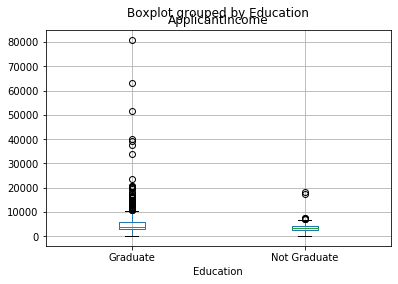

In [8]:
df.boxplot(column = 'ApplicantIncome',by = 'Education')

In [9]:
# DATA MUNGING
# we check the missing values and are doing something to handle the missing values

# Cleaning the data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Handling LoanAmount - we handle quantittive features first
# Values in LoanAmount are Numbers; in case numbers are missing we fill missing locations with the average of the coloumn

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['LoanAmount'].isnull().sum()

0

In [11]:
# Handling Self_Employed - Qualitative features
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
# We fill the missing data points with the value that occurs in most abundance in the column
df['Self_Employed'].fillna('No', inplace = True)
df['Self_Employed'].isnull().sum()

0

In [13]:
# Cleaning 'Gender'
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
df['Gender'].fillna('Male', inplace = True)
df['Gender'].isnull().sum()

0

In [15]:
# Cleaning 'Married'
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
df['Married'].fillna('Yes', inplace = True)
df['Married'].isnull().sum()

0

In [17]:
# Cleaning 'Dependents'
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
df['Dependents'].fillna('0', inplace = True)
df['Dependents'].isnull().sum()

0

In [19]:
# Cleaning 'Loan_Amount_Term'
df['Loan_Amount_Term'].value_counts() 

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df['Loan_Amount_Term'].fillna(360.0, inplace = True)
df['Loan_Amount_Term'].isnull().sum()

0

In [21]:
# Cleaning 'Credit_History'
df['Credit_History'].value_counts() 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
df['Credit_History'].fillna(1.0, inplace = True)
df['Credit_History'].isnull().sum()

0

In [23]:
# Encoding Data points
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Self_Employed','Education','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [25]:
Y = df['Loan_Status']
X = df.drop(['Loan_ID', 'Loan_Status'],axis = 1)

In [26]:
model.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
Y_pred = model.predict(X)

In [28]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,Y_pred))

0.7980456026058632
